Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

2023-03-19 13:54:42.206837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading MNIST dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


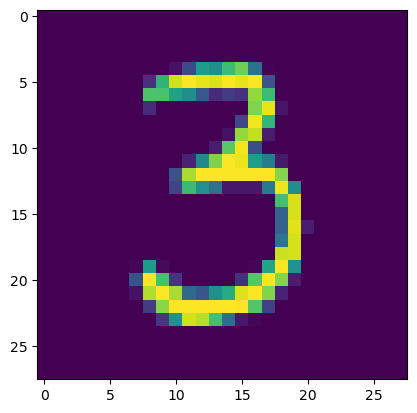

3


In [7]:
# display the image
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

Image Labels

In [8]:
# unique values in Y_train
print(np.unique(Y_train))
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [11]:
# setting up layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

2023-03-19 13:54:45.144598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 718us/step - loss: 0.2954 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 1s 758us/step - loss: 0.1370 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.1016 - accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.0829 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.0684 - accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.0602 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.0515 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.0433 - accuracy: 0.9865
Epoch 9/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.0398 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 1s 607u

Evaluation

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 453us/step - loss: 0.0997 - accuracy: 0.9714
0.9714000225067139


In [15]:
print(X_test.shape)

(10000, 28, 28)


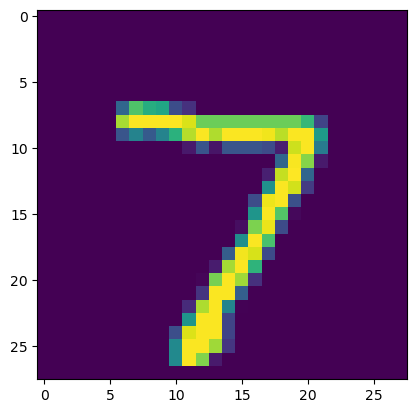

In [16]:
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 390us/step


In [19]:
Y_pred.shape

(10000, 10)

In [20]:
print(Y_pred[0])

[1.3714107e-02 1.5127991e-04 1.7972513e-01 9.1900474e-01 1.0738586e-06
 7.1839422e-02 2.5239530e-09 9.9999887e-01 2.3175627e-01 3.0431652e-01]


In [21]:
label = np.argmax(Y_pred[0])

In [22]:
print(label)

7


In [23]:
Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 4, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 7, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [24]:
conf_matrix = confusion_matrix(Y_test, Y_pred_label)

In [25]:
print(conf_matrix)

tf.Tensor(
[[ 972    0    0    0    1    1    1    1    3    1]
 [   0 1114    4    0    1    4    2    2    8    0]
 [   7    3  997    6    1    0    2    5   11    0]
 [   0    0    3  981    0   12    0    6    5    3]
 [   0    0    4    1  956    1    8    5    2    5]
 [   2    0    0    5    1  879    2    0    1    2]
 [   8    2    3    0   12    8  920    0    5    0]
 [   1    2    6    3    3    2    0 1005    4    2]
 [   3    0    3    6    6   11    1    1  940    3]
 [   3    2    0    4   25    5    1   16    3  950]], shape=(10, 10), dtype=int32)


Text(0.5, 135.7222222222222, 'Predicted Labels')

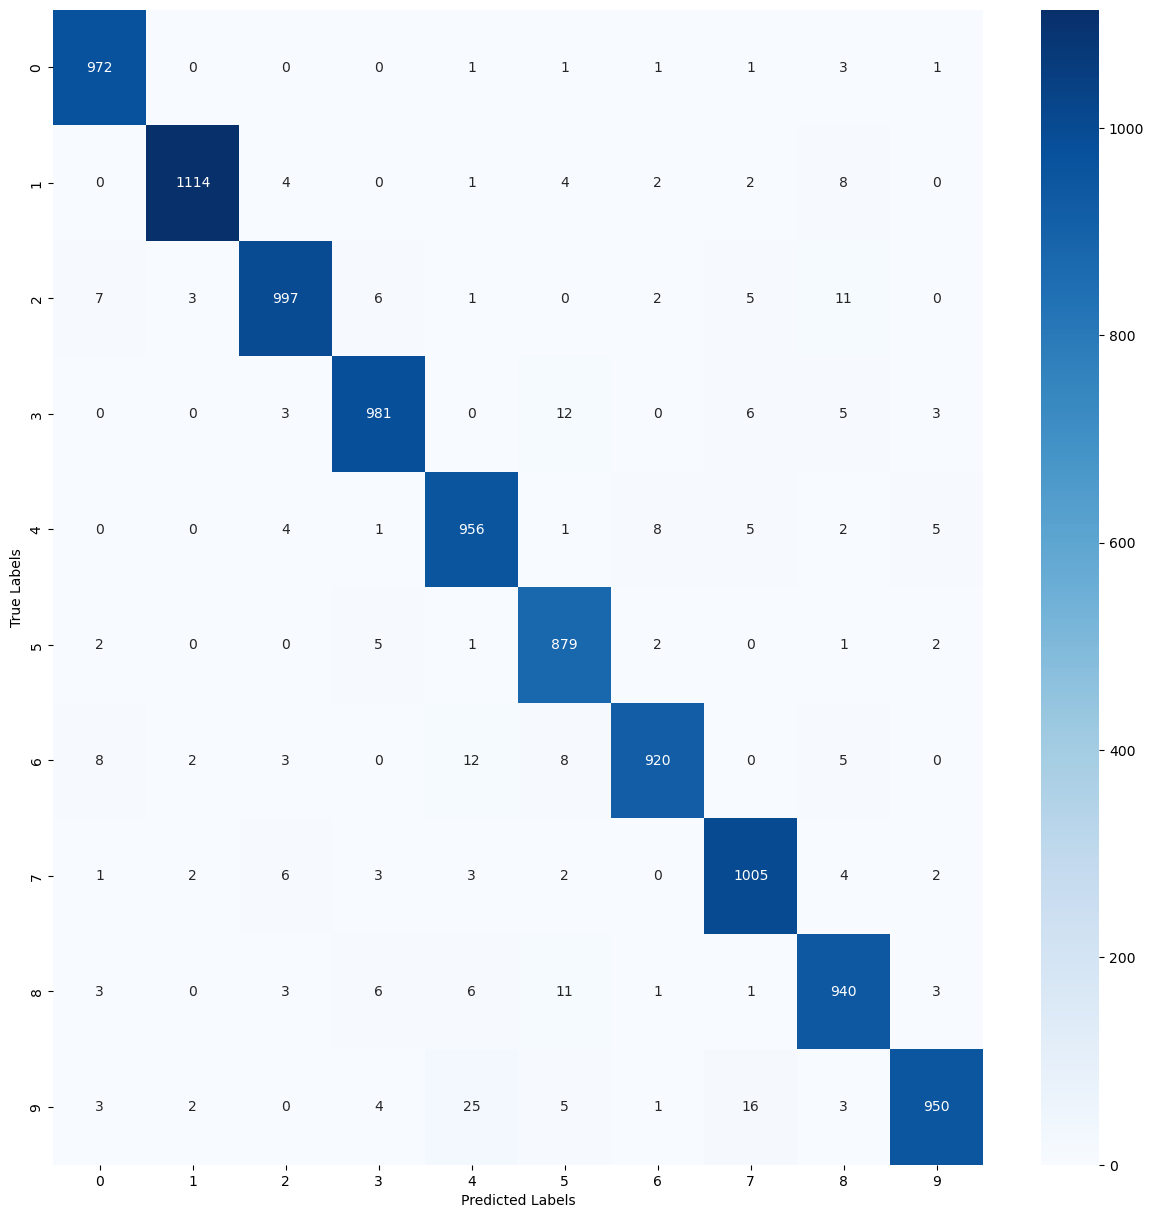

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Predictive System

In [27]:
input_image_path = 'test.png'
input_image = cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
input_image.shape

(650, 606, 3)

In [30]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(650, 606)

In [32]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [33]:
input_image_resize.shape

(28, 28)

In [34]:
input_image_resize = input_image_resize/255

In [35]:
image_reshape = np.reshape(input_image_resize,[1,28,28])

In [36]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

1/1 [==============================] - 0s 14ms/step
[[3.1416187e-07 3.2785285e-02 3.0741093e-01 9.9999964e-01 3.5786939e-11
  9.9737203e-01 7.4023274e-07 3.0214437e-07 6.2213498e-01 5.5882469e-05]]


In [37]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
